In [1]:
# Dependencies

%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# load files

city_data_load = "Resources/city_data.csv"

ride_data_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_load)

city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
sum(city_data_df['type']=='Urban')

66

In [7]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Create urban dataframe

urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# create suburban and rural DF

suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [11]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [12]:
# number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(['city']).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [13]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [14]:
# avg fare for each city in urban cities

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [15]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [16]:
# average number of drivers in each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [17]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

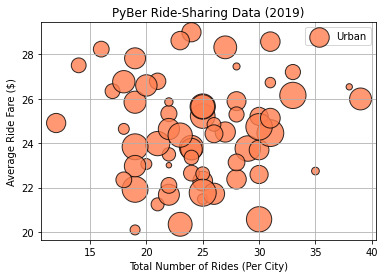

In [18]:
# build scatter plot for urban cities

plt.scatter(urban_ride_count, urban_avg_fare, linewidth=1,c = 'coral',edgecolor='k', alpha=0.8, s=[i*10 for i in urban_driver_count], label='Urban')

plt.title("PyBer Ride-Sharing Data (2019)")

plt.xlabel('Total Number of Rides (Per City)')

plt.ylabel("Average Ride Fare ($)")

plt.grid()

plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

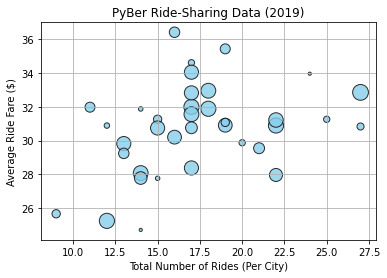

In [19]:
# build suburban scatter plot

plt.scatter(suburban_ride_count, suburban_avg_fare, linewidth=1, c='skyblue', edgecolor='k',alpha=0.8, s=[i*10 for i in suburban_driver_count], label='Suburban')

plt.xlabel('Total Number of Rides (Per City)')

plt.ylabel('Average Ride Fare ($)')

plt.title("PyBer Ride-Sharing Data (2019)")

plt.grid()

plt.legend

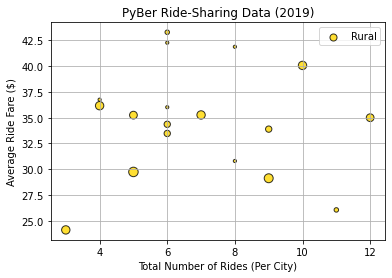

In [20]:
# build rural scatter plot

plt.scatter(rural_ride_count, rural_avg_fare, linewidth=1, c='gold',edgecolor='k',alpha=0.8, s=[i*10 for i in rural_driver_count], label='Rural')

plt.xlabel('Total Number of Rides (Per City)')

plt.ylabel('Average Ride Fare ($)')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.grid()

plt.legend()

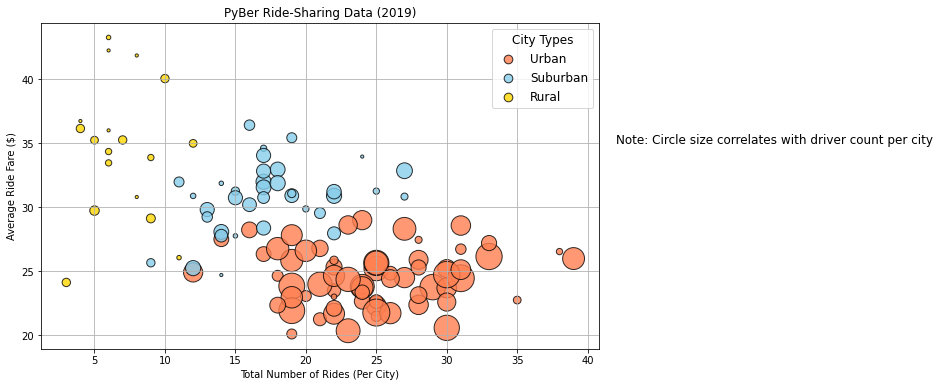

In [21]:
# combine all scatter charts
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_avg_fare, linewidth=1,c = 'coral',edgecolor='k', alpha=0.8, s=[i*10 for i in urban_driver_count], label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare, linewidth=1, c='skyblue', edgecolor='k',alpha=0.8, s=[i*10 for i in suburban_driver_count], label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare, linewidth=1, c='gold',edgecolor='k',alpha=0.8, s=[i*10 for i in rural_driver_count], label='Rural')

plt.xlabel('Total Number of Rides (Per City)')

plt.ylabel('Average Ride Fare ($)')

plt.title('PyBer Ride-Sharing Data (2019)')

plt.grid()

# Legend formatting

lgnd = plt.legend(fontsize='12', mode='Expanded',scatterpoints=1, loc='best', title="City Types")

lgnd.legendHandles[0]._sizes = [75]

lgnd.legendHandles[1]._sizes = [75]

lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# incorporate a text label about circle size

plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize='12',wrap=True)

# save the figure

plt.savefig("analysis/Fig1.png", bbox_inches='tight')

plt.show()

In [22]:
# get summary stats

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# calculate the mean of the ride count for each city type

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [27]:
suburban_ride_count.mode()

0    17
dtype: int64

In [28]:
# import numpy and scipy status module

import numpy as np

import scipy.stats as sts

In [29]:
# calculate the measures of central tendency for the ride count for urban cities

mean_urban_ride_count = np.mean(urban_ride_count)

print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)

print(f'The Median for the ride counts for urban trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)

print(f'The Mode for the ride counts for urban trips is {mode_urban_ride_count}')

The mean for the ride counts for urban trips is 24.62.
The Median for the ride counts for urban trips is 24.0
The Mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [30]:
print(sts.mode(rural_ride_count))



ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [34]:
# get fares for urban cities

urban_fares = urban_cities_df['fare']
suburban_fare = suburban_cities_df['fare']
rural_fare = rural_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [35]:
# calculate the measures of central tendency for the avg fare for urban cities

mean_urban_fares = np.mean(urban_fares)

print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}')

median_urban_fares = np.median(urban_fares)

print(f'The Median fare price for urban trips is ${median_urban_fares:.2f}')

mode_urban_fares = sts.mode(urban_fares)

print(f'The Mode fare price for urban trips is ${mode_urban_fares}')


The mean fare price for urban trips is $24.53
The Median fare price for urban trips is $24.64
The Mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [36]:
# get driver count data from urban cities

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


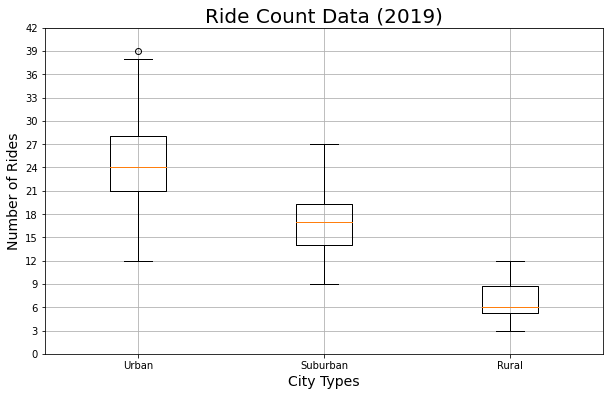

In [37]:
# Create box and whisker for all cities ride count

x_labels = ['Urban','Suburban','Rural']

ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data, labels=x_labels)

# add Title, y axis and grid

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_xlabel("City Types",fontsize=14)

ax.set_ylabel("Number of Rides",fontsize=14)

ax.set_yticks(np.arange(0,45, step=3.0))

ax.grid()

# save the figure

plt.savefig("analysis/Fig2.png")

plt.show()

In [38]:
# get the outlying city that matches 39

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


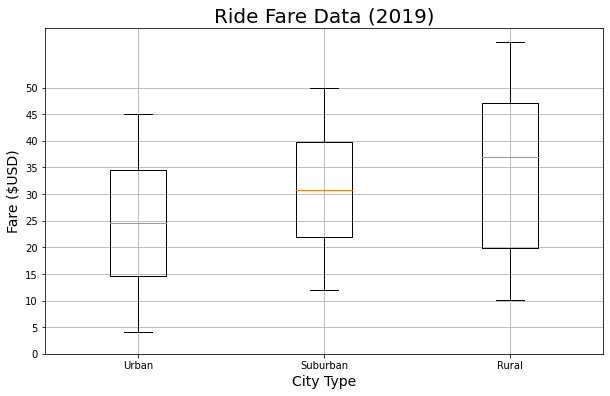

In [39]:
# box and whisker for fare data

x_labels = ['Urban', 'Suburban', 'Rural']

fare_count_data = [urban_fare, suburban_fare, rural_fare]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(fare_count_data, labels=x_labels)

ax.set_title('Ride Fare Data (2019)',fontsize = 20)

ax.set_ylabel('Fare ($USD)',fontsize=14)

ax.set_xlabel('City Type',fontsize=14)

ax.set_yticks(np.arange(0,51, step=5.0))

ax.grid()

plt.show()



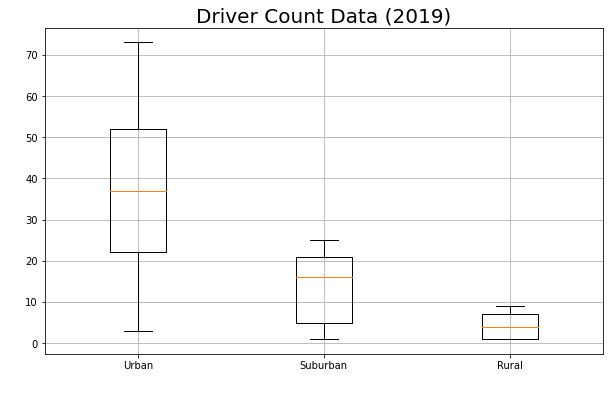

In [40]:
#  box and whisker for driver count data

x_labels = ['Urban', 'Suburban', 'Rural']

driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(driver_count_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)', fontsize = 20)

ax.set_ylabel('Number of Drivers', fontsize=14,c='white')

ax.set_xlabel('City Type', fontsize=14, c='white')

ax.grid()

plt.show()

In [42]:
# Get the sum of the fares for each city type

sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [44]:
# get the sum of all the fares

total_fares = pyber_data_df['fare'].sum()

total_fares

63538.64

In [46]:
# calculate the % of fare for each city

type_percents = 100 * sum_fares_by_type / total_fares

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

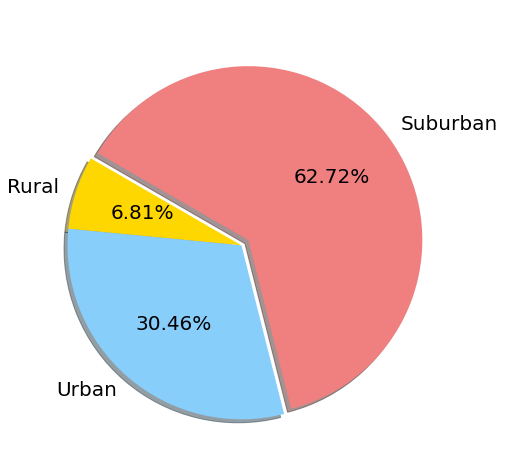

In [77]:
# import mpl to change the plot config using rcParams
import matplotlib as mpl

# build the percentage fares by city type pie chart
plt.subplots(figsize=(10,8))
plt.pie(type_percents, labels=['Rural','Urban','Suburban'], colors=['gold','lightskyblue','lightcoral'],explode = [0,0,0.05],shadow=True,autopct='%.2f%%', startangle=150)

plt.title("% of Total Fares by City Type",color='white',fontsize=20)

mpl.rcParams['font.size'] = 20


# save

plt.savefig("analysis/Fig5.png")
        
plt.show()